# Simple perceptron – a linear separable classifier

## introduction

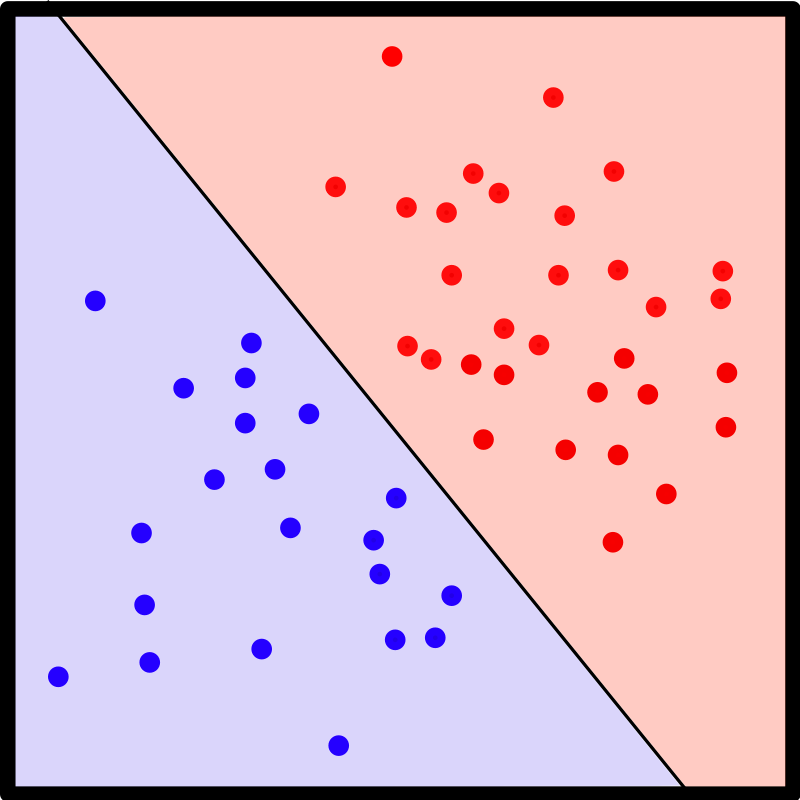



The existence of a line separating the two types of points means that the data is linearly separable


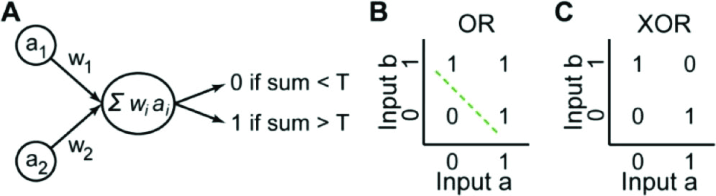




A simple Perceptron and the problem of linear separation. A) A simple Perceptron with two inputs a 1 and a 2 and the associated weights w 1 and w 2 . B) Linear separation of the OR operator (green line). C) The XOR operator is not linearly separable.

quicklatex.com-923908543ec9d2a7c8ba5b6cd9a5cc9d_l3.svg

Linearly Separable n-Dimensional Data

w is the vector orthogonal to the hyperplane. x stands for an object from the feature space.

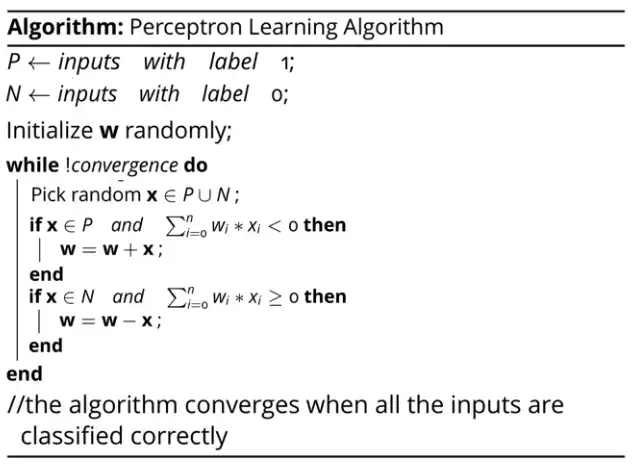

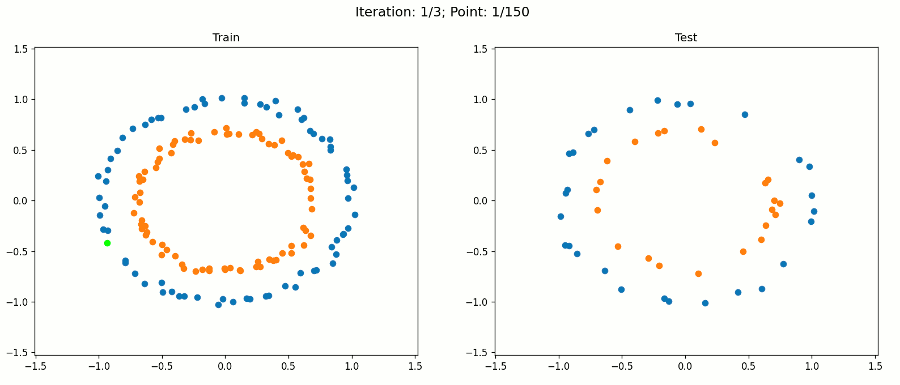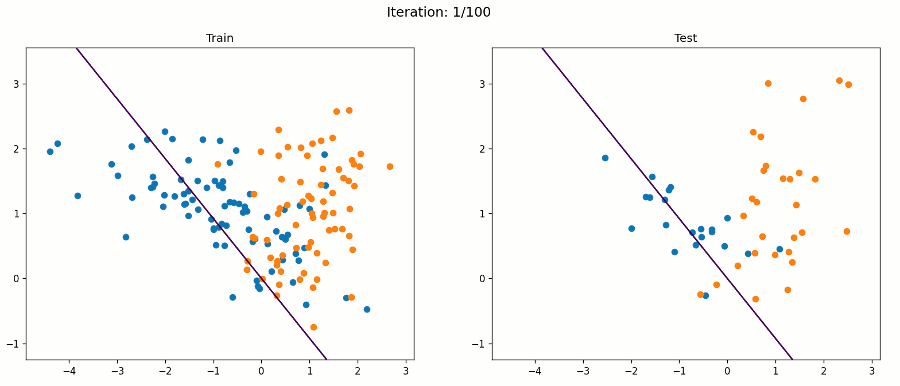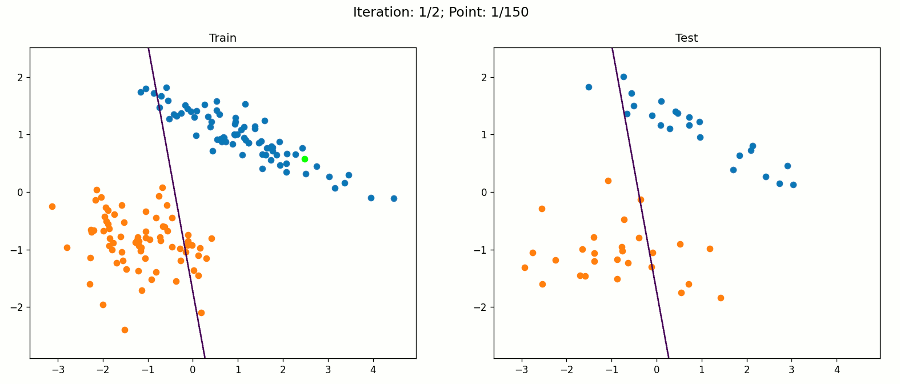

## implementation

In [13]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

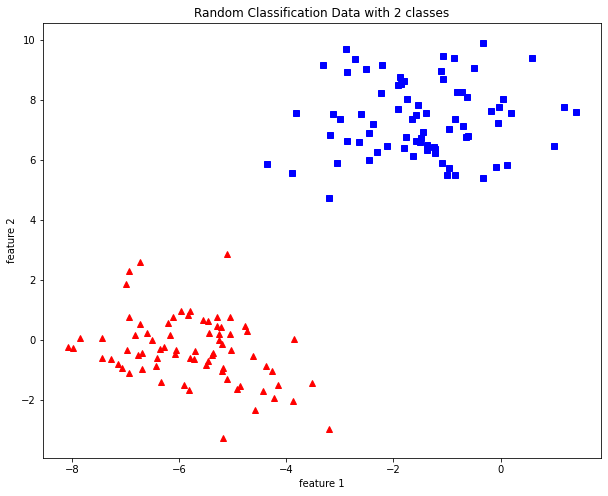

In [14]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=22)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [15]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [16]:
def perceptron(X, y, epochs):
#def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += ((y[idx] - y_hat)*x_i)
                #theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [17]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')


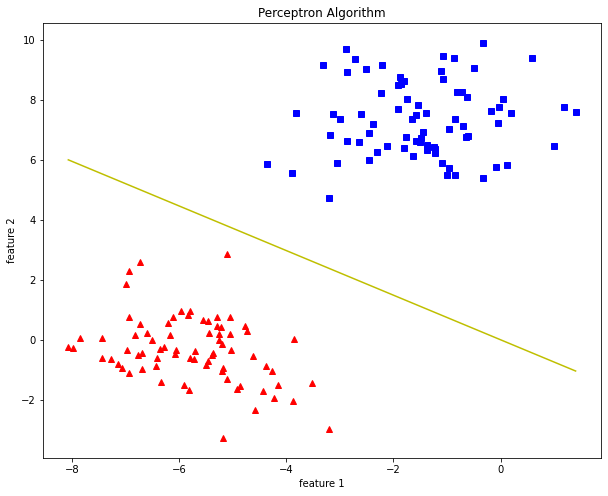

In [18]:
theta, miss_l = perceptron(X, y, 100)
#theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)